In [1]:
import sys
#!conda config --append channels conda-forge
#!{sys.executable} -m pip install pydotplus 
#!{sys.executable} -m pip install seaborn 
#!{sys.executable} -m pip install mlxtend  
#!conda install --prefix {sys.prefix} scikitplot
#!{sys.executable} -m pip install scikit-plot

In [2]:
import os
import numpy as np
import pandas as pd

#import sys
#!{sys.executable} -m pip install mlxtend  
#!conda install --yes --prefix {sys.prefix} graphviz
import pydotplus 

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

import scikitplot as skplt

import sklearn.metrics

from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, load_digits


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.decomposition import PCA

from IPython.display import Image, display
from scipy.stats import randint

from mlxtend.plotting import plot_decision_regions

matplotlib.rcParams['figure.figsize'] = [10, 7]

/home/cordeiro/env/py3im/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: No module named 'mlxtend'

In [3]:
iris = load_iris()

X = iris.data  
y = iris.target

# for the plot :P
pca = PCA(n_components=2)
X_reduced = X# pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.4)

# Árvore

In [4]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=2)

scores = cross_val_score(clf, X_reduced, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(X_train, y_train)

Accuracy: 0.93 (+/- 0.09)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

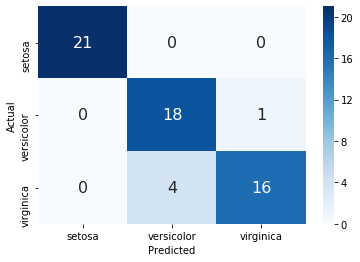

In [5]:
preditor = clf.predict(X_test)

cm = sklearn.metrics.confusion_matrix(y_test, preditor)

df_cm = pd.DataFrame(cm, columns=iris.target_names, index = iris.target_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

ax = sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})
ax.set_ylim(3, 0)
plt.show()

In [6]:
metrics = sklearn.metrics.classification_report(y_test, preditor, output_dict=True)
metrics = pd.DataFrame(metrics).transpose()
display(metrics)

,f1-score,precision,recall,support
0,1.000000,1.000000,1.000000,21.000000
1,0.878049,0.818182,0.947368,19.000000
2,0.864865,0.941176,0.800000,20.000000
accuracy,0.916667,0.916667,0.916667,0.916667
macro avg,0.914305,0.919786,0.915789,60.000000
weighted avg,0.916337,0.922816,0.916667,60.000000


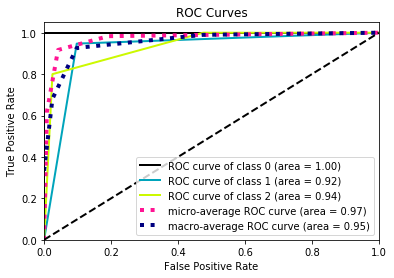

In [7]:
preditor = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, preditor)
plt.show()

Dá pra ver especialmente na ROC da classe 0 que ela sempre acerta (classe 0 = setosa).

# Naive Bayes

In [27]:
clf = GaussianNB()
scores = cross_val_score(clf, X_reduced, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(X_train, y_train)


Accuracy: 0.95 (+/- 0.05)


GaussianNB(priors=None, var_smoothing=1e-09)

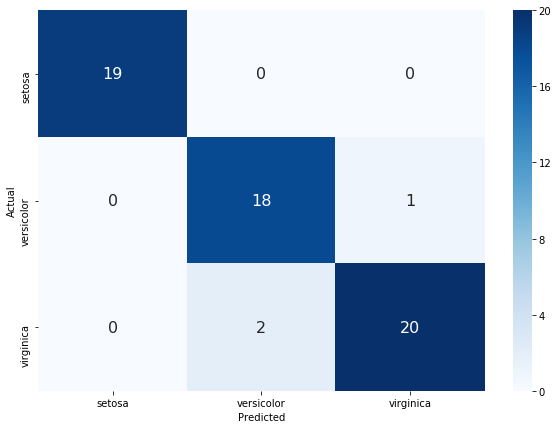

In [28]:
preditor = clf.predict(X_test)

cm = sklearn.metrics.confusion_matrix(y_test, preditor)

df_cm = pd.DataFrame(cm, columns=iris.target_names, index = iris.target_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

ax = sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})
ax.set_ylim(3, 0)
plt.show()

In [29]:
metrics = sklearn.metrics.classification_report(y_test, preditor, output_dict=True)
metrics = pd.DataFrame(metrics).transpose()
display(metrics)

,f1-score,precision,recall,support
0,1.000000,1.000000,1.000000,19.00
1,0.923077,0.900000,0.947368,19.00
2,0.930233,0.952381,0.909091,22.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.951103,0.950794,0.952153,60.00
weighted avg,0.950060,0.950873,0.950000,60.00


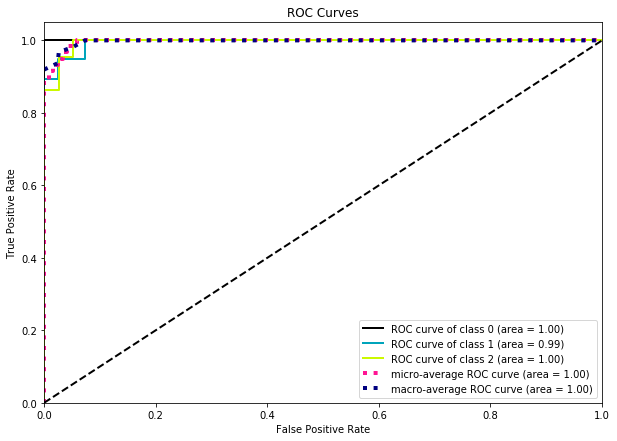

In [30]:
preditor = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, preditor)
plt.show()

In [31]:
# kNN
## uma execução
## KNeighborsClassifier(n_neighbors=k)

0.9666666666666667
0.9333333333333333
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.95
0.95
0.9333333333333333
0.9833333333333333


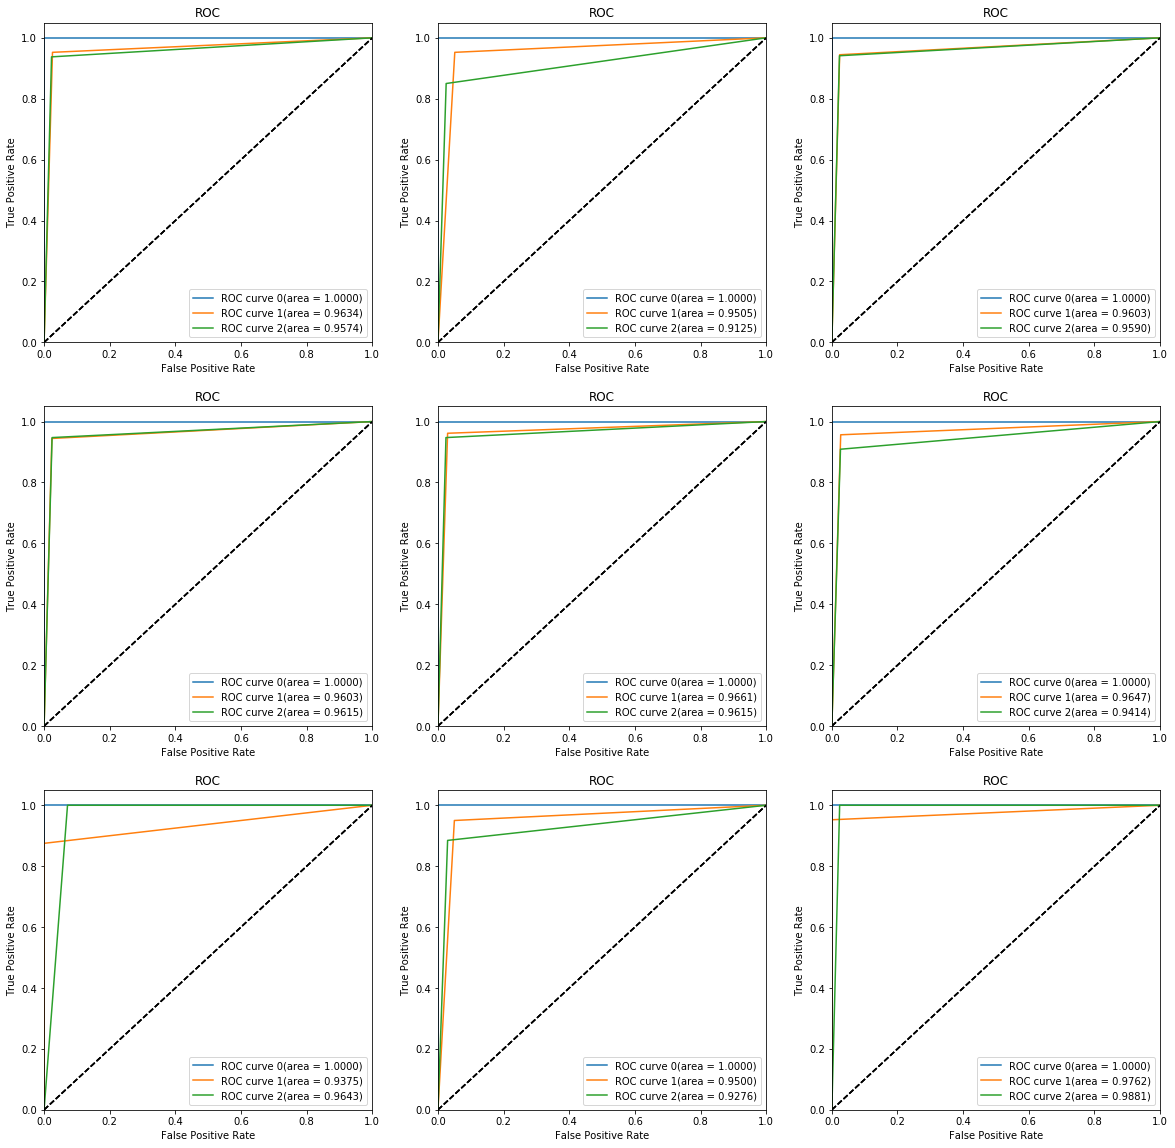

In [32]:
yb = label_binarize(y, classes=[0,1,2])
#X_train, X_test, y_train, y_test = train_test_split(X_reduced, yb, test_size=0.4) #usaria mesmo split com diferentes k
fig = plt.figure(figsize=(20,20))

X_train, X_test, y_train, y_test = train_test_split(X_reduced, yb, test_size=0.4)

final = []
for k in range(1,10):
      
    clf = KNeighborsClassifier(n_neighbors=k)    
    #y_score = clf.fit(X_train, y_train).predict(X_test)
    clf.fit(X_train, y_train)
    preditor = clf.predict(X_test)
    
    #print(sklearn.metrics.classification_report(y_test, preditor))    
    print(sklearn.metrics.accuracy_score(y_test, preditor))
    final.append(sklearn.metrics.accuracy_score(y_test, preditor))
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(0,3):
        fpr[i], tpr[i], _ = sklearn.metrics.roc_curve(y_test[:, i], preditor[:, i])
        roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
        
    # Plot of a ROC curve for a specific class
    plt.subplot(3, 3, k)  
    for i in range(0,3):

        plt.plot(fpr[i], tpr[i], label='ROC curve ' + str(i) + '(area = %0.4f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc="lower right")
plt.show()


In [33]:
# kNN
## várias execuções
## KNeighborsClassifier(n_neighbors=k)

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(X_reduced, yb, test_size=0.4) #usaria mesmo split com diferentes k
fig = plt.figure(figsize=(20,20))

finalRandomSampling = []
nb = []
for k in range(1,50,2):
    ans = []
    #print("Number of neighbors %d" % k)    
    for r in range(1,20):
    
        clf = KNeighborsClassifier(n_neighbors=k)
        X_train, X_test, y_train, y_test = train_test_split(X_reduced, yb, test_size=0.4)
        preditor = clf.fit(X_train, y_train).predict(X_test)
        
        ans.append(sklearn.metrics.accuracy_score(y_test, preditor))
        #print("Accuracy for %d: " % k, sklearn.metrics.accuracy_score(y_test, preditor))
    finalRandomSampling.append(np.mean(ans))
    nb.append(k)

<Figure size 1440x1440 with 0 Axes>

In [35]:
# kNN
## Validação Cruzada
## KNeighborsClassifier(n_neighbors=k)

In [36]:
finalCrossValidation = []
nb = []
for k in range(1,50,2):
    ans = []    
    clf = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(clf, X_reduced, y, cv=5)
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))    
    ans.append(scores.mean())
    finalCrossValidation.append(np.mean(ans))
    nb.append(k)

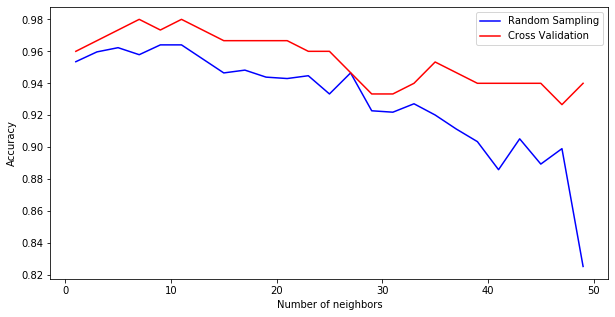

In [37]:
fig = plt.figure(figsize=(10,5))
plt.plot(nb, finalRandomSampling, 'b', label = 'Random Sampling')
plt.plot(nb, finalCrossValidation, 'r', label = 'Cross Validation')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
#Com k=3 

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.4)
clf = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(clf, X_reduced, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(X_train, y_train)


Accuracy: 0.97 (+/- 0.04)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')